# Face Detection Comparison

Several face detection technique:
1. Haar Cascade Classifier
2. Dlib HOG
3. MTCNN

In [1]:
import os
import cv2 as cv
import dlib
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

In [2]:
model_dir_path = 'model_data/'
CASCADE_CLASSIFIER_MODEL_PATH = os.path.join(model_dir_path, 'haarcascade_frontalface_alt.xml')

In [3]:
cascade_detector = cv.CascadeClassifier(CASCADE_CLASSIFIER_MODEL_PATH)
dlib_hog_detector = dlib.get_frontal_face_detector()
mtcnn_detector = MTCNN()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [4]:
# Not gray img, but RGB
gray_img = cv.cvtColor(cv.imread('../lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg'), cv.COLOR_BGR2RGB)

## Haar Cascade Classifier

In [5]:
face_bboxes = cascade_detector.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

In [6]:
gray_img_copy = gray_img.copy()
for face in face_bboxes:
    x, y, w, h = face
    cv.rectangle(gray_img_copy, (x,y), (x+w, y+h), (0,255,0), 2)

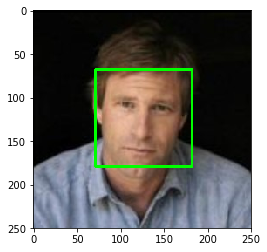

In [7]:
plt.imshow(gray_img_copy, cmap='gray')

## Dlib HOG

In [8]:
face_bboxes = dlib_hog_detector(gray_img, 1)

In [9]:
gray_img_copy = gray_img.copy()
for face in face_bboxes:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y

    # draw box over face
    cv.rectangle(gray_img_copy, (x,y), (x+w,y+h), (0,255,0), 2)

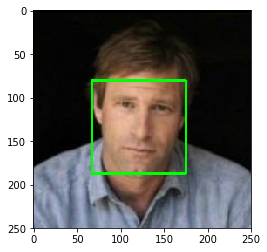

In [10]:
plt.imshow(gray_img_copy, cmap='gray')

## MTCNN

In [11]:
detection_result = mtcnn_detector.detect_faces(gray_img)    

In [12]:
gray_img_copy = gray_img.copy()
for face in detection_result:
    face_bbox = face['box']
    x, y, w, h = face_bbox
    
    cv.rectangle(gray_img_copy, (x,y), (x+w,y+h), (0,255,0), 2)

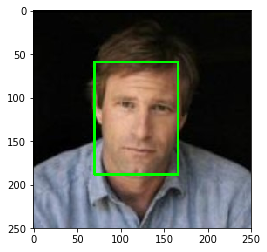

In [13]:
plt.imshow(gray_img_copy, cmap='gray')

## Compare Using Face Detection (Face Bio) Dataset

In [14]:
DIR_PATH = '../BioID-FaceDatabase-V1.2/'
image_path_list = []
eye_path_list = []
for root, dirs, files in os.walk(DIR_PATH):
    for filename in files:
        file_path = os.path.join(root, filename)
        if filename.split('.')[1] == 'pgm':
            image_path_list.append(file_path)
        elif filename.split('.')[1] == 'eye':
            eye_path_list.append(file_path)

In [15]:
image_path_list.sort()
eye_path_list.sort()

In [16]:
eye_position_list = []
for file_path in eye_path_list:
    with open(file_path, 'r') as file:
        eye_position = list(map(int, file.readlines()[1].split()))
        eye_position_list.append(eye_position)

In [17]:
def check_true(eye_position, x, y, w, h):
    # Check X
    if eye_position[0] >= x and eye_position[0] <= x+w and eye_position[2] >= x and eye_position[2] <= x+w:
        if eye_position[1] >= y and eye_position[1] <= y+h and eye_position[3] >= y and eye_position[3] <= y+h:
            return True
    return False

In [18]:
TRUE_RESULT = len(image_path_list)

In [21]:
TRUE_RESULT

1521

## First Detection

### Cascade Classifier

In [28]:
cascade_detector_result = 0
for idx, img_path in enumerate(image_path_list):
    img = cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)
    face_bboxes = cascade_detector.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
    if len(face_bboxes) == 1:
        x, y, w, h = face_bboxes[0]

        if check_true(eye_position_list[idx], x, y, w, h):
            cascade_detector_result += 1

In [29]:
print(cascade_detector_result)

1435


### Dlib HOG

In [34]:
dlib_hog_result = 0
for idx, img_path in enumerate(image_path_list):
    img = cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)
    face_bboxes = dlib_hog_detector(img, 2)
    if (len(face_bboxes) == 1):
        for face in face_bboxes:
            x = face.left()
            y = face.top()
            w = face.right() - x
            h = face.bottom() - y 
            if check_true(eye_position_list[idx], x, y, w, h):
                dlib_hog_result += 1

In [35]:
print(dlib_hog_result)

1515


### MTCNN

In [32]:
mtcnn_result = 0
for idx, img_path in enumerate(image_path_list):
    img = cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)
    detection_result = mtcnn_detector.detect_faces(img)
    if (len(detection_result) == 1):
        for face in detection_result:
            face_bbox = face['box']
            x, y, w, h = face_bbox
            if check_true(eye_position_list[idx], x, y, w, h):
                mtcnn_result += 1

In [33]:
print(mtcnn_result)

1507
